In [1]:
import sys
import os
from glob import glob
sys.path.append("../")
from NEATModels import NEATStaticDetection, nets
from NEATModels.Staticconfig  import StaticNeatConfig
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [2]:
#Input the training directory containing training image patches and labels 
TrainDataDir = '/data/u934/service_imagerie/v_kapoor/FinalONEATTraining/SmallStaticCenterTrainData/'
#Directory containing the train category json, model parameter and weight vector file
ModelDir = '/data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/'
#Model name based on wether it is residual or sequntial ONEAT network
Model_Name = 'ORStaticONEAT.h5'
StaticCategoriesJson = ModelDir + 'StaticCategories.json'
KeyCategories = load_json(StaticCategoriesJson)

StaticCordJson = ModelDir + 'StaticCord.json'
KeyCord = load_json(StaticCordJson)

In [3]:
#Neural network parameters
#For ORNET use residual = True and for OSNET use residual = False
residual = True
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 48
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 3
mid_kernel = 3
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 29
#Training epochs, longer the better zith proper chosen leqrning rate
epochs = 150
#Size of the gradient descent length vector, start small and use callbacs to get smaller when reaching the minima
learning_rate = 1.0E-6
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 50
# use softmax for single event per box, sigmoid for multi event per box
multievent = False
# Grid and number of boxes for yolo
gridX = 1
gridY = 1
nboxes = 1
#Weightage to co-ordinate loss term
lambdacord = 1

In [4]:
config = StaticNeatConfig(residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel,
                         startfiler = startfilter, gridX = gridX, gridY = gridY, nboxes = nboxes, lambdacord = lambdacord,
                         epochs = epochs, categories = len(KeyCategories), box_vector = len(KeyCord), learning_rate = learning_rate,
                         batch_size = batch_size, ModelName = Model_Name, multievent = multievent)

config_json = config.to_json()
show = True
print(config)
save_json(config_json, ModelDir + Model_Name + '_Parameter.json')

StaticNeatConfig(ModelName='ORStaticONEAT.h5', batch_size=50, box_vector=5, categories=4, depth=29, epochs=150, gridX=1, gridY=1, lambdacord=1, learning_rate=1e-06, mid_kernel=3, multievent=True, nboxes=1, residual=True, start_kernel=3, startfilter=48)


number of  images:	 1698
image size:		 (1698, 64, 64, 1)
Labels:				 (1698, 1, 1, 9)














Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 48)   480         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 64, 64, 48)   192         conv2d_1[0][0]                   
_________________________________________________________________________________________________



Train on 1613 samples, validate on 85 samples
Epoch 1/150
1613/1613 [==============================] - 14s 8ms/step - loss: 2.8692 - acc: 0.0304 - val_loss: 2.7782 - val_acc: 0.0118

Epoch 00001: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


<Figure size 432x288 with 0 Axes>

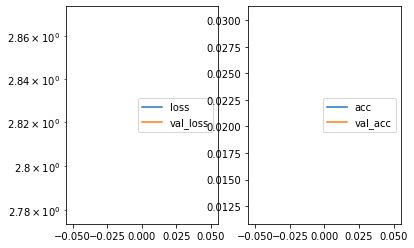

XYHWC: [[[0.6894668  0.42263752 0.4902227  0.6068508  0.6404796 ]]]
Top predictions :  Normal Probability : [[0.6303852]]
Top predictions :  MacroCheate Probability : [[0.49463895]]
Top predictions :  NonMatureP1 Probability : [[0.67018867]]
Top predictions :  MatureP1 Probability : [[0.29268408]]
True Label :  [0.         0.         0.         1.         0.49278846 0.44104251
 0.28125    0.328125   1.        ]


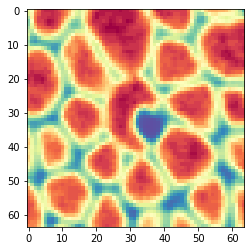

Epoch 2/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.7916 - acc: 0.0143 - val_loss: 2.8143 - val_acc: 0.0118

Epoch 00002: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


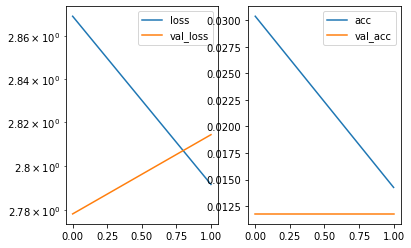

XYHWC: [[[0.7601038  0.30606425 0.7189048  0.7560065  0.87212324]]]
Top predictions :  Normal Probability : [[0.6230377]]
Top predictions :  MacroCheate Probability : [[0.4907768]]
Top predictions :  NonMatureP1 Probability : [[0.66616327]]
Top predictions :  MatureP1 Probability : [[0.29064646]]
True Label :  [0.         0.         0.         1.         0.55655027 0.5197583
 0.53125    0.578125   1.        ]


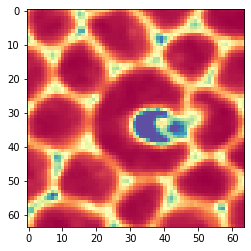

Epoch 3/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.7909 - acc: 0.0105 - val_loss: 2.7864 - val_acc: 0.0000e+00

Epoch 00003: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


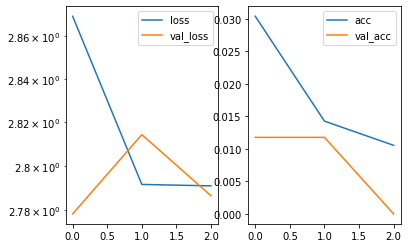

XYHWC: [[[0.6683899  0.40750954 0.7200162  0.7412764  0.90666515]]]
Top predictions :  Normal Probability : [[0.61409914]]
Top predictions :  MacroCheate Probability : [[0.48633593]]
Top predictions :  NonMatureP1 Probability : [[0.66031766]]
Top predictions :  MatureP1 Probability : [[0.2932132]]
True Label :  [0.         0.         0.         1.         0.57966135 0.52242416
 0.390625   0.421875   1.        ]


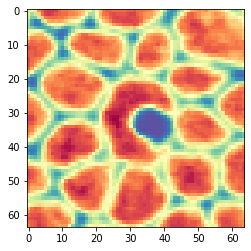

Epoch 4/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.7447 - acc: 0.0105 - val_loss: 2.7366 - val_acc: 0.0000e+00

Epoch 00004: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


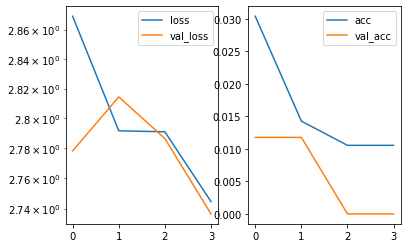

XYHWC: [[[0.74312246 0.4106701  0.54012954 0.6008439  0.87107813]]]
Top predictions :  Normal Probability : [[0.6044864]]
Top predictions :  MacroCheate Probability : [[0.4799139]]
Top predictions :  NonMatureP1 Probability : [[0.65162164]]
Top predictions :  MatureP1 Probability : [[0.29565495]]
True Label :  [0.         1.         0.         0.         0.50117622 0.52715997
 0.515625   0.765625   1.        ]


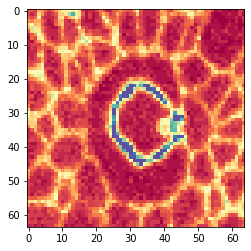

Epoch 5/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.7156 - acc: 0.0180 - val_loss: 2.7319 - val_acc: 0.0235

Epoch 00005: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


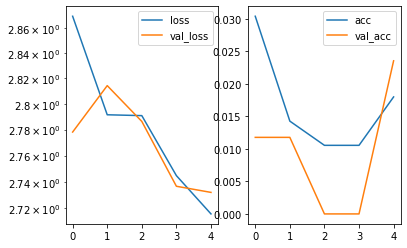

XYHWC: [[[0.7345301  0.4194511  0.42746693 0.5825164  0.7841017 ]]]
Top predictions :  Normal Probability : [[0.59195566]]
Top predictions :  MacroCheate Probability : [[0.4731222]]
Top predictions :  NonMatureP1 Probability : [[0.6441835]]
Top predictions :  MatureP1 Probability : [[0.2965884]]
True Label :  [0.         0.         1.         0.         0.51757204 0.49250389
 0.53125    0.484375   1.        ]


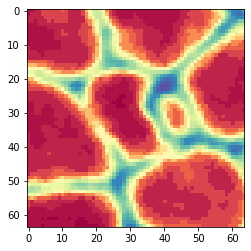

Epoch 6/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.6991 - acc: 0.0335 - val_loss: 2.7169 - val_acc: 0.0235

Epoch 00006: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


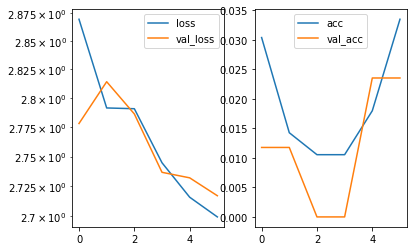

XYHWC: [[[0.71345574 0.47079355 0.5395322  0.65419745 0.7602228 ]]]
Top predictions :  Normal Probability : [[0.57886237]]
Top predictions :  MacroCheate Probability : [[0.46477285]]
Top predictions :  NonMatureP1 Probability : [[0.6356837]]
Top predictions :  MatureP1 Probability : [[0.29848075]]
True Label :  [0.         1.         0.         0.         0.50117622 0.52715997
 0.515625   0.765625   1.        ]


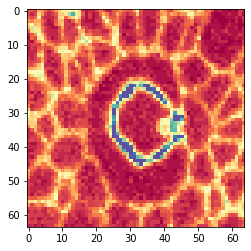

Epoch 7/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.6761 - acc: 0.0409 - val_loss: 2.7022 - val_acc: 0.0118

Epoch 00007: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


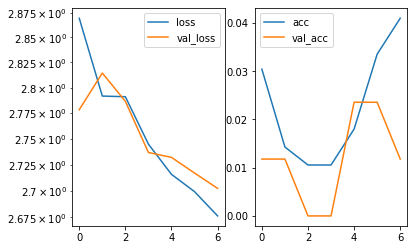

XYHWC: [[[0.7731215  0.47569385 0.65035963 0.66959774 0.84189725]]]
Top predictions :  Normal Probability : [[0.56598073]]
Top predictions :  MacroCheate Probability : [[0.45706597]]
Top predictions :  NonMatureP1 Probability : [[0.62491757]]
Top predictions :  MatureP1 Probability : [[0.30150795]]
True Label :  [0.         0.         0.         1.         0.49278846 0.44104251
 0.28125    0.328125   1.        ]


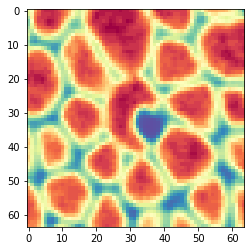

Epoch 8/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.6602 - acc: 0.0378 - val_loss: 2.6991 - val_acc: 0.0118

Epoch 00008: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


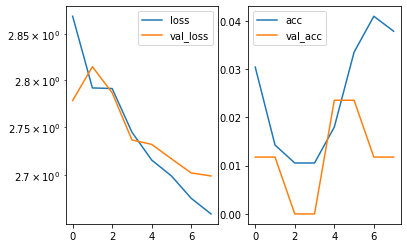

XYHWC: [[[0.74297476 0.47289914 0.6373535  0.635476   0.8924228 ]]]
Top predictions :  Normal Probability : [[0.55116487]]
Top predictions :  MacroCheate Probability : [[0.44967833]]
Top predictions :  NonMatureP1 Probability : [[0.61695033]]
Top predictions :  MatureP1 Probability : [[0.30344328]]
True Label :  [0.         0.         0.         1.         0.62748454 0.47946113
 0.359375   0.3125     1.        ]


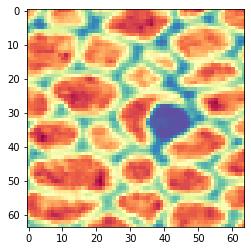

Epoch 9/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.6440 - acc: 0.0285 - val_loss: 2.6871 - val_acc: 0.0235

Epoch 00009: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


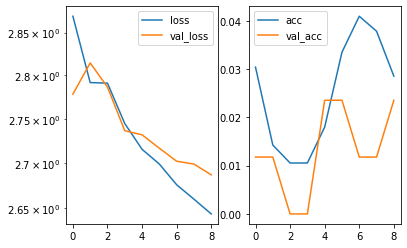

XYHWC: [[[0.7412916  0.50408745 0.5781733  0.6020321  0.8973316 ]]]
Top predictions :  Normal Probability : [[0.5376561]]
Top predictions :  MacroCheate Probability : [[0.44261238]]
Top predictions :  NonMatureP1 Probability : [[0.60938996]]
Top predictions :  MatureP1 Probability : [[0.30455595]]
True Label :  [1.         0.         0.         0.         0.4945007  0.51353003
 0.21875    0.28125    1.        ]


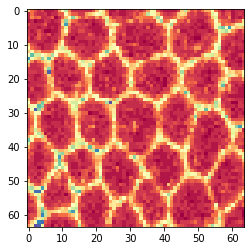

Epoch 10/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.6324 - acc: 0.0347 - val_loss: 2.6720 - val_acc: 0.0235

Epoch 00010: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


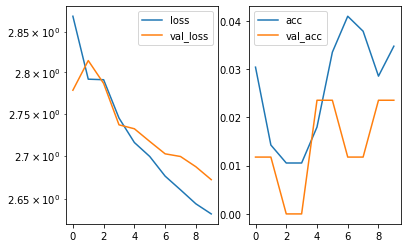

XYHWC: [[[0.761914   0.5119185  0.54427046 0.59869766 0.87387705]]]
Top predictions :  Normal Probability : [[0.5240787]]
Top predictions :  MacroCheate Probability : [[0.435381]]
Top predictions :  NonMatureP1 Probability : [[0.60158306]]
Top predictions :  MatureP1 Probability : [[0.30621922]]
True Label :  [0.         0.         0.         1.         0.52219742 0.46009425
 0.8125     0.59375    1.        ]


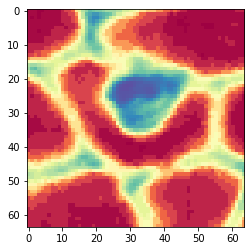

Epoch 11/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.6167 - acc: 0.0378 - val_loss: 2.6645 - val_acc: 0.0118

Epoch 00011: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


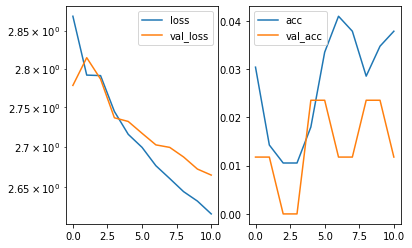

XYHWC: [[[0.7367732  0.5070513  0.59408563 0.59272456 0.8460684 ]]]
Top predictions :  Normal Probability : [[0.5127396]]
Top predictions :  MacroCheate Probability : [[0.42834893]]
Top predictions :  NonMatureP1 Probability : [[0.59287953]]
Top predictions :  MatureP1 Probability : [[0.3090232]]
True Label :  [0.         0.         0.         1.         0.55209693 0.4665062
 0.390625   0.328125   1.        ]


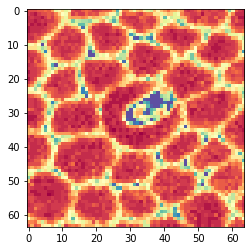

Epoch 12/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.6034 - acc: 0.0453 - val_loss: 2.6522 - val_acc: 0.0118

Epoch 00012: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


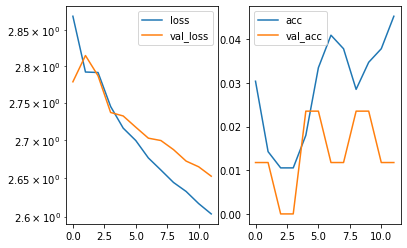

XYHWC: [[[0.7463066  0.5306609  0.60511464 0.5684225  0.85838807]]]
Top predictions :  Normal Probability : [[0.5004634]]
Top predictions :  MacroCheate Probability : [[0.42228708]]
Top predictions :  NonMatureP1 Probability : [[0.5862927]]
Top predictions :  MatureP1 Probability : [[0.31077605]]
True Label :  [0.         0.         1.         0.         0.55794271 0.49755859
 0.1875     0.1875     1.        ]


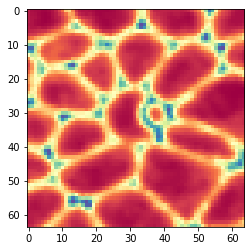

Epoch 13/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.5923 - acc: 0.0378 - val_loss: 2.6470 - val_acc: 0.0118

Epoch 00013: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


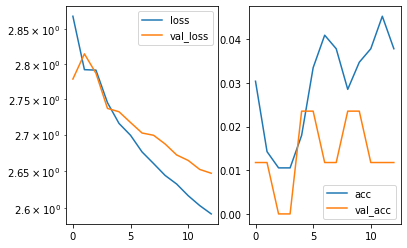

XYHWC: [[[0.74158084 0.52286345 0.5755627  0.5456218  0.8915061 ]]]
Top predictions :  Normal Probability : [[0.48959756]]
Top predictions :  MacroCheate Probability : [[0.41614437]]
Top predictions :  NonMatureP1 Probability : [[0.5802862]]
Top predictions :  MatureP1 Probability : [[0.31254506]]
True Label :  [1.         0.         0.         0.         0.48368685 0.47146211
 0.421875   0.375      1.        ]


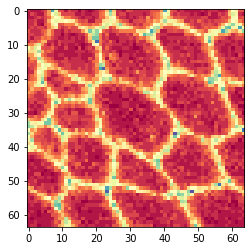

Epoch 14/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.5850 - acc: 0.0304 - val_loss: 2.6392 - val_acc: 0.0000e+00

Epoch 00014: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


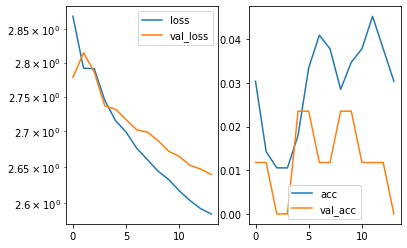

XYHWC: [[[0.7271015  0.5423399  0.5540489  0.53385425 0.9077654 ]]]
Top predictions :  Normal Probability : [[0.478932]]
Top predictions :  MacroCheate Probability : [[0.40940383]]
Top predictions :  NonMatureP1 Probability : [[0.5736151]]
Top predictions :  MatureP1 Probability : [[0.31553745]]
True Label :  [0.         0.         1.         0.         0.53298611 0.49211516
 0.28125    0.265625   1.        ]


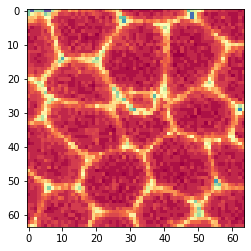

Epoch 15/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.5737 - acc: 0.0267 - val_loss: 2.6313 - val_acc: 0.0000e+00

Epoch 00015: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


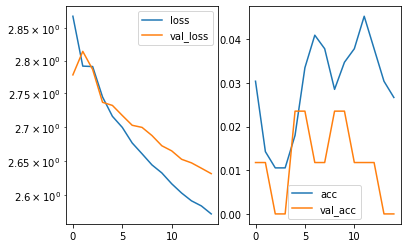

XYHWC: [[[0.7398173  0.52981615 0.55861586 0.5323469  0.9056772 ]]]
Top predictions :  Normal Probability : [[0.46685773]]
Top predictions :  MacroCheate Probability : [[0.40345603]]
Top predictions :  NonMatureP1 Probability : [[0.56892335]]
Top predictions :  MatureP1 Probability : [[0.31630614]]
True Label :  [0.         0.         0.         1.         0.55655027 0.5197583
 0.53125    0.578125   1.        ]


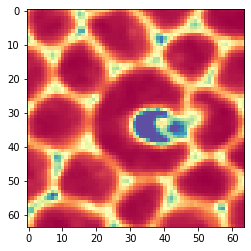

Epoch 16/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.5620 - acc: 0.0291 - val_loss: 2.6249 - val_acc: 0.0118

Epoch 00016: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


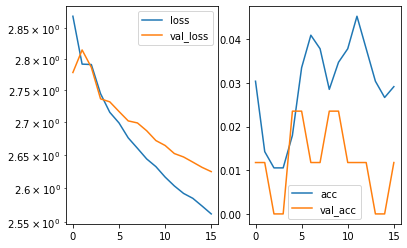

XYHWC: [[[0.7229953 0.5385293 0.5621354 0.5075858 0.8959723]]]
Top predictions :  Normal Probability : [[0.45706022]]
Top predictions :  MacroCheate Probability : [[0.3972556]]
Top predictions :  NonMatureP1 Probability : [[0.56263393]]
Top predictions :  MatureP1 Probability : [[0.31835574]]
True Label :  [0.        0.        1.        0.        0.4002259 0.5151073 0.3125
 0.359375  1.       ]


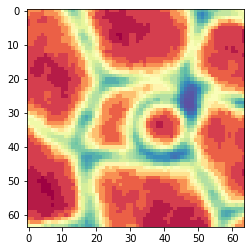

Epoch 17/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.5530 - acc: 0.0298 - val_loss: 2.6181 - val_acc: 0.0000e+00

Epoch 00017: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


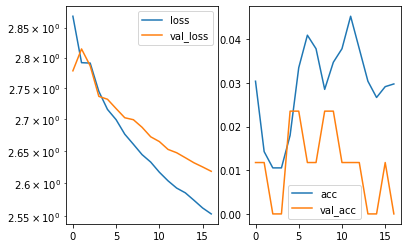

XYHWC: [[[0.7289038  0.54107034 0.54828733 0.48751262 0.89104736]]]
Top predictions :  Normal Probability : [[0.4467677]]
Top predictions :  MacroCheate Probability : [[0.3907694]]
Top predictions :  NonMatureP1 Probability : [[0.5568683]]
Top predictions :  MatureP1 Probability : [[0.3201887]]
True Label :  [1.         0.         0.         0.         0.5541266  0.53441506
 0.40625    0.34375    1.        ]


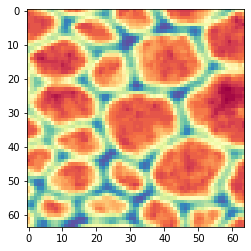

Epoch 18/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.5460 - acc: 0.0267 - val_loss: 2.6133 - val_acc: 0.0000e+00

Epoch 00018: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


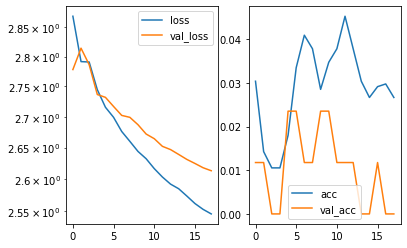

XYHWC: [[[0.7204615  0.533911   0.5307927  0.48833466 0.8954389 ]]]
Top predictions :  Normal Probability : [[0.4359539]]
Top predictions :  MacroCheate Probability : [[0.3850884]]
Top predictions :  NonMatureP1 Probability : [[0.5518094]]
Top predictions :  MatureP1 Probability : [[0.32042313]]
True Label :  [0.         0.         1.         0.         0.57653166 0.47400973
 0.515625   0.65625    1.        ]


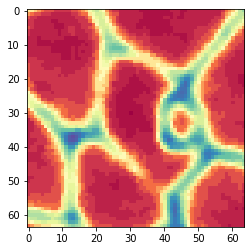

Epoch 19/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.5383 - acc: 0.0316 - val_loss: 2.6061 - val_acc: 0.0000e+00

Epoch 00019: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


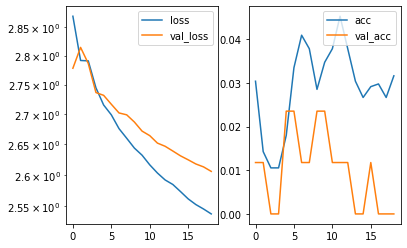

XYHWC: [[[0.71548474 0.547325   0.54314494 0.49549398 0.90180683]]]
Top predictions :  Normal Probability : [[0.4292933]]
Top predictions :  MacroCheate Probability : [[0.37971815]]
Top predictions :  NonMatureP1 Probability : [[0.54457635]]
Top predictions :  MatureP1 Probability : [[0.32216412]]
True Label :  [0.         0.         1.         0.         0.45885791 0.48133993
 0.25       0.234375   1.        ]


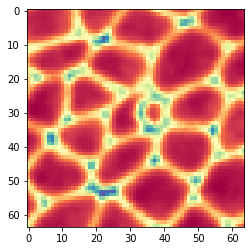

Epoch 20/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.5331 - acc: 0.0254 - val_loss: 2.6042 - val_acc: 0.0000e+00

Epoch 00020: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


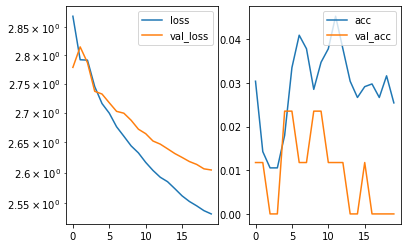

XYHWC: [[[0.70195764 0.53480077 0.5397037  0.48343807 0.9069487 ]]]
Top predictions :  Normal Probability : [[0.42183298]]
Top predictions :  MacroCheate Probability : [[0.3741998]]
Top predictions :  NonMatureP1 Probability : [[0.5389063]]
Top predictions :  MatureP1 Probability : [[0.32279763]]
True Label :  [0.         0.         0.         1.         0.45963297 0.56138602
 0.484375   0.390625   1.        ]


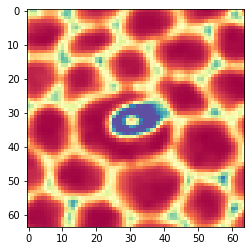

Epoch 21/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.5256 - acc: 0.0260 - val_loss: 2.5981 - val_acc: 0.0000e+00

Epoch 00021: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


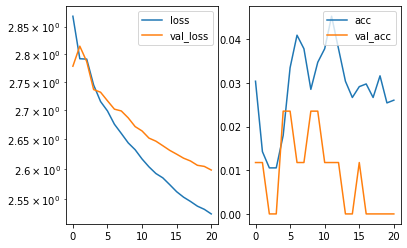

XYHWC: [[[0.71588105 0.54217553 0.5342701  0.4727666  0.91046655]]]
Top predictions :  Normal Probability : [[0.4130596]]
Top predictions :  MacroCheate Probability : [[0.36903295]]
Top predictions :  NonMatureP1 Probability : [[0.5341951]]
Top predictions :  MatureP1 Probability : [[0.32330015]]
True Label :  [0.         1.         0.         0.         0.50874174 0.51376652
 0.390625   0.40625    1.        ]


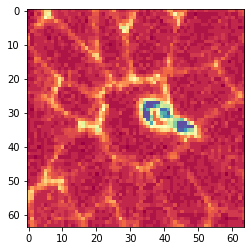

Epoch 22/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.5191 - acc: 0.0248 - val_loss: 2.5939 - val_acc: 0.0000e+00

Epoch 00022: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


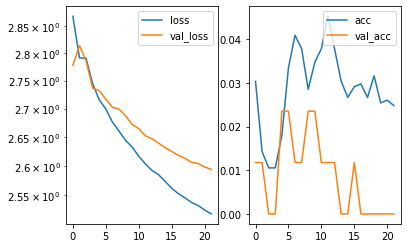

XYHWC: [[[0.69912994 0.54784465 0.5256446  0.47471857 0.9110179 ]]]
Top predictions :  Normal Probability : [[0.40513563]]
Top predictions :  MacroCheate Probability : [[0.36416334]]
Top predictions :  NonMatureP1 Probability : [[0.5295159]]
Top predictions :  MatureP1 Probability : [[0.32345128]]
True Label :  [0.         0.         0.         1.         0.53985596 0.47387695
 0.296875   0.265625   1.        ]


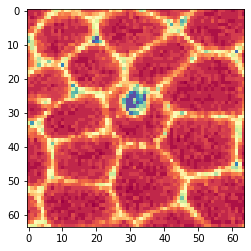

Epoch 23/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.5139 - acc: 0.0248 - val_loss: 2.5912 - val_acc: 0.0000e+00

Epoch 00023: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


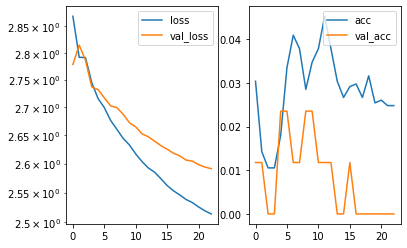

XYHWC: [[[0.70630753 0.52951753 0.5394724  0.47771388 0.91014904]]]
Top predictions :  Normal Probability : [[0.39703935]]
Top predictions :  MacroCheate Probability : [[0.35916397]]
Top predictions :  NonMatureP1 Probability : [[0.52534217]]
Top predictions :  MatureP1 Probability : [[0.3235135]]
True Label :  [0.         0.         1.         0.         0.40998932 0.43790064
 0.203125   0.21875    1.        ]


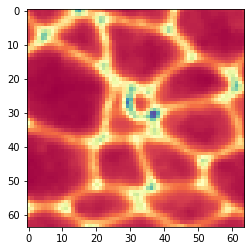

Epoch 24/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.5081 - acc: 0.0267 - val_loss: 2.5866 - val_acc: 0.0000e+00

Epoch 00024: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


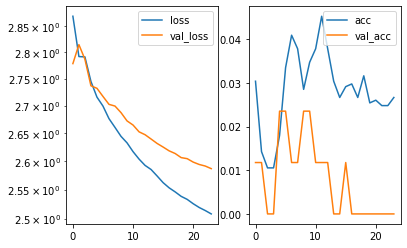

XYHWC: [[[0.70117706 0.5518773  0.544478   0.4609557  0.91143036]]]
Top predictions :  Normal Probability : [[0.39015424]]
Top predictions :  MacroCheate Probability : [[0.35447294]]
Top predictions :  NonMatureP1 Probability : [[0.521711]]
Top predictions :  MatureP1 Probability : [[0.32379708]]
True Label :  [0.         0.         1.         0.         0.48747784 0.47285018
 0.15625    0.28125    1.        ]


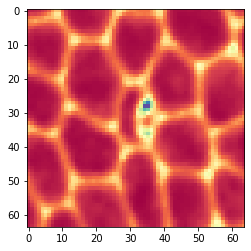

Epoch 25/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.5043 - acc: 0.0260 - val_loss: 2.5847 - val_acc: 0.0000e+00

Epoch 00025: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


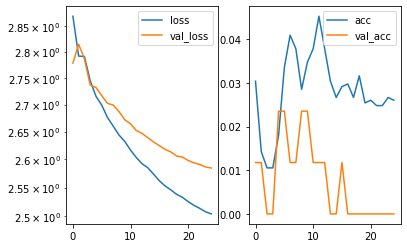

XYHWC: [[[0.71117    0.5325702  0.53785837 0.46700633 0.913234  ]]]
Top predictions :  Normal Probability : [[0.38215816]]
Top predictions :  MacroCheate Probability : [[0.3500787]]
Top predictions :  NonMatureP1 Probability : [[0.51817274]]
Top predictions :  MatureP1 Probability : [[0.3238271]]
True Label :  [0.         0.         0.         1.         0.57966135 0.52242416
 0.390625   0.421875   1.        ]


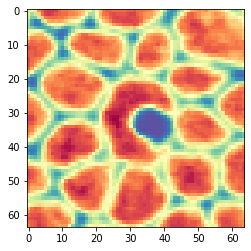

Epoch 26/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.4996 - acc: 0.0248 - val_loss: 2.5809 - val_acc: 0.0000e+00

Epoch 00026: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


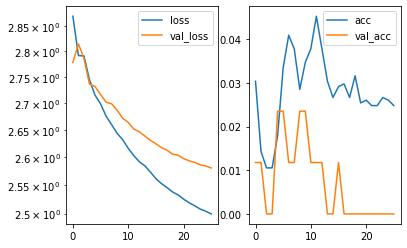

XYHWC: [[[0.70124066 0.53367454 0.5392875  0.47361383 0.914486  ]]]
Top predictions :  Normal Probability : [[0.37593758]]
Top predictions :  MacroCheate Probability : [[0.34461385]]
Top predictions :  NonMatureP1 Probability : [[0.51410043]]
Top predictions :  MatureP1 Probability : [[0.3249598]]
True Label :  [0.         0.         1.         0.         0.53298611 0.49211516
 0.28125    0.265625   1.        ]


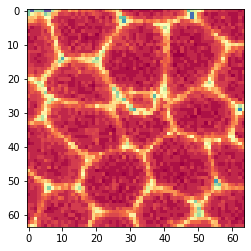

Epoch 27/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.4934 - acc: 0.0242 - val_loss: 2.5768 - val_acc: 0.0000e+00

Epoch 00027: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


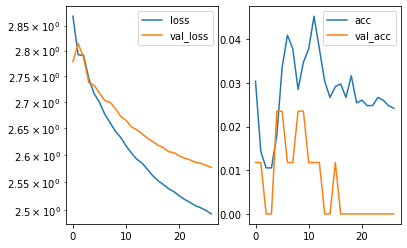

XYHWC: [[[0.7048785  0.54113114 0.5477233  0.47096244 0.9152262 ]]]
Top predictions :  Normal Probability : [[0.3692044]]
Top predictions :  MacroCheate Probability : [[0.33995792]]
Top predictions :  NonMatureP1 Probability : [[0.51058316]]
Top predictions :  MatureP1 Probability : [[0.32582754]]
True Label :  [0.         1.         0.         0.         0.48776042 0.46446615
 0.734375   1.625      1.        ]


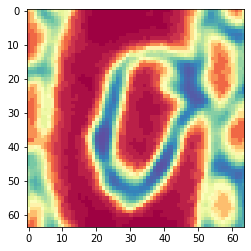

Epoch 28/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.4930 - acc: 0.0260 - val_loss: 2.5754 - val_acc: 0.0000e+00

Epoch 00028: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


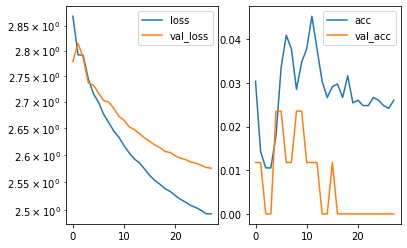

XYHWC: [[[0.70100874 0.52988887 0.54974884 0.46583858 0.9178103 ]]]
Top predictions :  Normal Probability : [[0.36279395]]
Top predictions :  MacroCheate Probability : [[0.33539927]]
Top predictions :  NonMatureP1 Probability : [[0.5064233]]
Top predictions :  MatureP1 Probability : [[0.3274933]]
True Label :  [1.         0.         0.         0.         0.50796569 0.47947304
 0.109375   0.15625    1.        ]


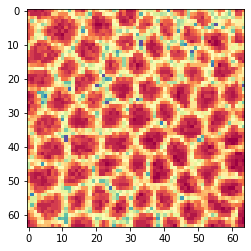

Epoch 29/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.4860 - acc: 0.0229 - val_loss: 2.5725 - val_acc: 0.0000e+00

Epoch 00029: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


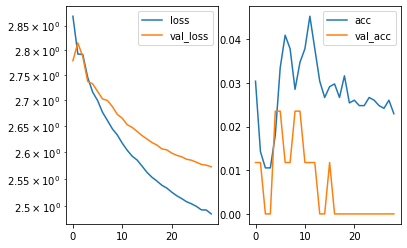

XYHWC: [[[0.69751424 0.5409403  0.54262596 0.45824245 0.919139  ]]]
Top predictions :  Normal Probability : [[0.35708994]]
Top predictions :  MacroCheate Probability : [[0.33135068]]
Top predictions :  NonMatureP1 Probability : [[0.50287956]]
Top predictions :  MatureP1 Probability : [[0.32760125]]
True Label :  [0.         0.         0.         1.         0.5842473  0.53032978
 0.578125   0.5625     1.        ]


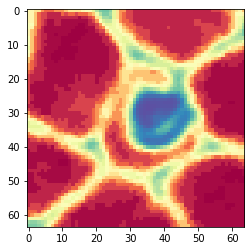

Epoch 30/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.4829 - acc: 0.0267 - val_loss: 2.5700 - val_acc: 0.0000e+00

Epoch 00030: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


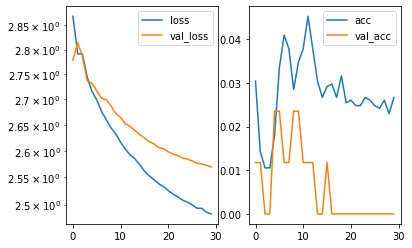

XYHWC: [[[0.70024073 0.5400561  0.53574944 0.46213627 0.9210361 ]]]
Top predictions :  Normal Probability : [[0.35138598]]
Top predictions :  MacroCheate Probability : [[0.3270871]]
Top predictions :  NonMatureP1 Probability : [[0.49927315]]
Top predictions :  MatureP1 Probability : [[0.32788768]]
True Label :  [0.         0.         0.         1.         0.44339623 0.46757075
 0.40625    0.34375    1.        ]


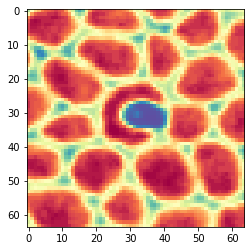

Epoch 31/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.4795 - acc: 0.0248 - val_loss: 2.5679 - val_acc: 0.0000e+00

Epoch 00031: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


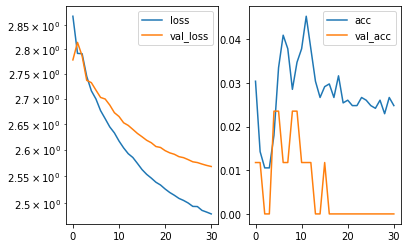

XYHWC: [[[0.69335526 0.53538275 0.5452023  0.46651548 0.92365956]]]
Top predictions :  Normal Probability : [[0.34509343]]
Top predictions :  MacroCheate Probability : [[0.32363096]]
Top predictions :  NonMatureP1 Probability : [[0.49631456]]
Top predictions :  MatureP1 Probability : [[0.32881176]]
True Label :  [0.         0.         0.         1.         0.44339623 0.46757075
 0.40625    0.34375    1.        ]


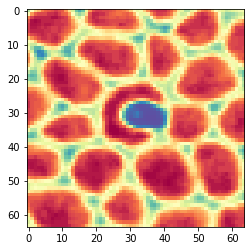

Epoch 32/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.4745 - acc: 0.0223 - val_loss: 2.5649 - val_acc: 0.0000e+00

Epoch 00032: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


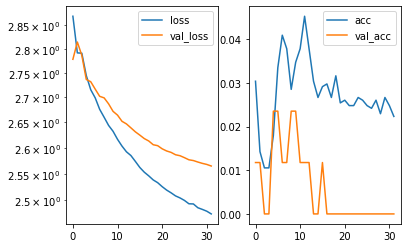

XYHWC: [[[0.6925653  0.54338247 0.5527381  0.4630951  0.9251548 ]]]
Top predictions :  Normal Probability : [[0.33914474]]
Top predictions :  MacroCheate Probability : [[0.32045108]]
Top predictions :  NonMatureP1 Probability : [[0.49291474]]
Top predictions :  MatureP1 Probability : [[0.3294561]]
True Label :  [0.         0.         1.         0.         0.51678107 0.52019509
 0.515625   0.5        1.        ]


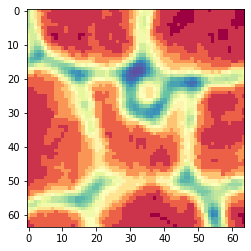

Epoch 33/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.4716 - acc: 0.0198 - val_loss: 2.5636 - val_acc: 0.0000e+00

Epoch 00033: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


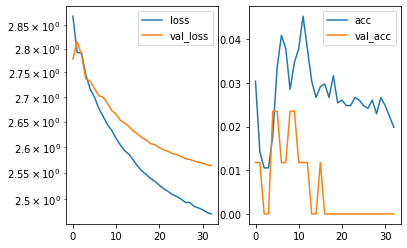

XYHWC: [[[0.6905836  0.5407853  0.54586583 0.45888388 0.92612827]]]
Top predictions :  Normal Probability : [[0.33506918]]
Top predictions :  MacroCheate Probability : [[0.3171643]]
Top predictions :  NonMatureP1 Probability : [[0.48905224]]
Top predictions :  MatureP1 Probability : [[0.3310477]]
True Label :  [0.         0.         1.         0.         0.53298611 0.49211516
 0.28125    0.265625   1.        ]


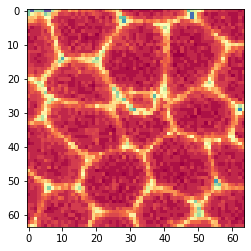

Epoch 34/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.4692 - acc: 0.0229 - val_loss: 2.5611 - val_acc: 0.0000e+00

Epoch 00034: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


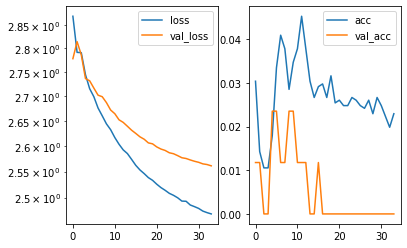

XYHWC: [[[0.69021654 0.5433164  0.5440794  0.45674    0.9265593 ]]]
Top predictions :  Normal Probability : [[0.3296224]]
Top predictions :  MacroCheate Probability : [[0.31359202]]
Top predictions :  NonMatureP1 Probability : [[0.4851318]]
Top predictions :  MatureP1 Probability : [[0.33321357]]
True Label :  [0.         0.         1.         0.         0.45885791 0.48133993
 0.25       0.234375   1.        ]


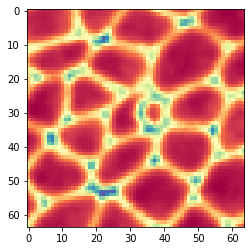

Epoch 35/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.4657 - acc: 0.0223 - val_loss: 2.5587 - val_acc: 0.0000e+00

Epoch 00035: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


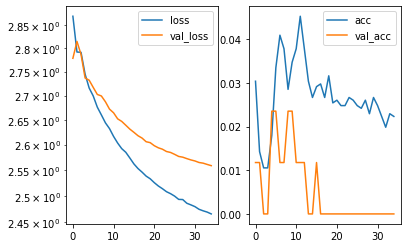

XYHWC: [[[0.67757475 0.5516128  0.54636854 0.45435637 0.9272009 ]]]
Top predictions :  Normal Probability : [[0.32413134]]
Top predictions :  MacroCheate Probability : [[0.31082642]]
Top predictions :  NonMatureP1 Probability : [[0.481729]]
Top predictions :  MatureP1 Probability : [[0.33501828]]
True Label :  [0.         1.         0.         0.         0.4409868  0.49891272
 0.65625    0.90625    1.        ]


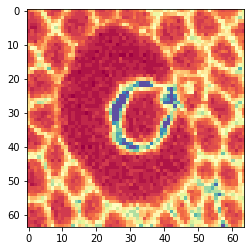

Epoch 36/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.4631 - acc: 0.0211 - val_loss: 2.5589 - val_acc: 0.0000e+00

Epoch 00036: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


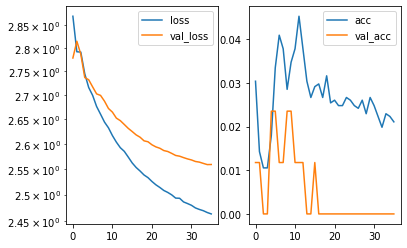

XYHWC: [[[0.6896352  0.5325788  0.5460293  0.45148715 0.9291754 ]]]
Top predictions :  Normal Probability : [[0.31670317]]
Top predictions :  MacroCheate Probability : [[0.30849293]]
Top predictions :  NonMatureP1 Probability : [[0.47942916]]
Top predictions :  MatureP1 Probability : [[0.33456045]]
True Label :  [0.         0.         1.         0.         0.55794271 0.49755859
 0.1875     0.1875     1.        ]


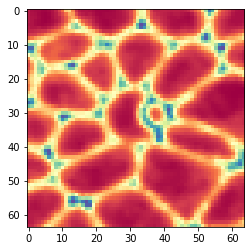

Epoch 37/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.4608 - acc: 0.0217 - val_loss: 2.5563 - val_acc: 0.0000e+00

Epoch 00037: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


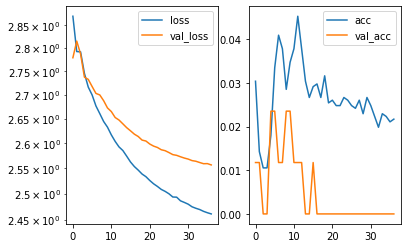

XYHWC: [[[0.6752019  0.545686   0.5475947  0.44633946 0.9303555 ]]]
Top predictions :  Normal Probability : [[0.31136358]]
Top predictions :  MacroCheate Probability : [[0.3055599]]
Top predictions :  NonMatureP1 Probability : [[0.47650093]]
Top predictions :  MatureP1 Probability : [[0.33624062]]
True Label :  [0.         0.         1.         0.         0.3817903  0.45151869
 0.484375   0.390625   1.        ]


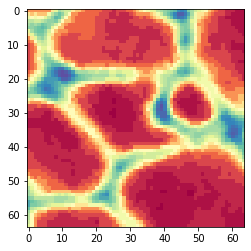

Epoch 38/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.4576 - acc: 0.0211 - val_loss: 2.5541 - val_acc: 0.0000e+00

Epoch 00038: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


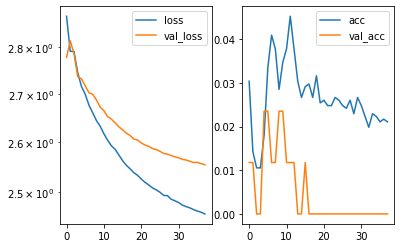

XYHWC: [[[0.68384326 0.5421362  0.5421235  0.44591832 0.9308951 ]]]
Top predictions :  Normal Probability : [[0.30667517]]
Top predictions :  MacroCheate Probability : [[0.30246556]]
Top predictions :  NonMatureP1 Probability : [[0.47380862]]
Top predictions :  MatureP1 Probability : [[0.33844924]]
True Label :  [1.         0.         0.         0.         0.5541266  0.53441506
 0.40625    0.34375    1.        ]


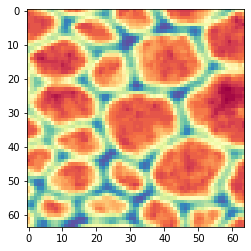

Epoch 39/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.4549 - acc: 0.0242 - val_loss: 2.5523 - val_acc: 0.0000e+00

Epoch 00039: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


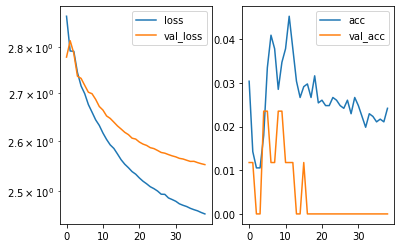

XYHWC: [[[0.6800577  0.5403541  0.5455524  0.44360554 0.93059355]]]
Top predictions :  Normal Probability : [[0.3028253]]
Top predictions :  MacroCheate Probability : [[0.29943714]]
Top predictions :  NonMatureP1 Probability : [[0.47084978]]
Top predictions :  MatureP1 Probability : [[0.34070194]]
True Label :  [0.         0.         0.         1.         0.44861931 0.52089481
 0.546875   0.671875   1.        ]


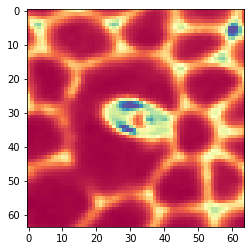

Epoch 40/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.4511 - acc: 0.0223 - val_loss: 2.5509 - val_acc: 0.0000e+00

Epoch 00040: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


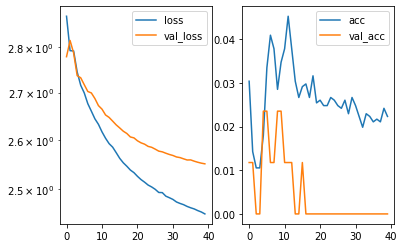

XYHWC: [[[0.6828792  0.54384136 0.54382384 0.43856576 0.9320502 ]]]
Top predictions :  Normal Probability : [[0.29798037]]
Top predictions :  MacroCheate Probability : [[0.2971734]]
Top predictions :  NonMatureP1 Probability : [[0.46855867]]
Top predictions :  MatureP1 Probability : [[0.34200007]]
True Label :  [0.         0.         1.         0.         0.53227273 0.50662879
 0.515625   0.53125    1.        ]


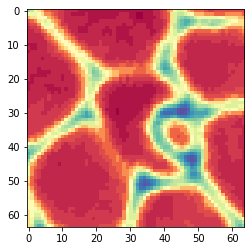

Epoch 41/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.4494 - acc: 0.0186 - val_loss: 2.5497 - val_acc: 0.0000e+00

Epoch 00041: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


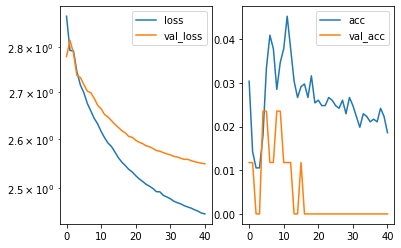

XYHWC: [[[0.67640567 0.5431335  0.546207   0.43533543 0.9324746 ]]]
Top predictions :  Normal Probability : [[0.29371578]]
Top predictions :  MacroCheate Probability : [[0.29451585]]
Top predictions :  NonMatureP1 Probability : [[0.46582764]]
Top predictions :  MatureP1 Probability : [[0.3439654]]
True Label :  [0.         0.         0.         1.         0.53086193 0.49530229
 0.53125    0.53125    1.        ]


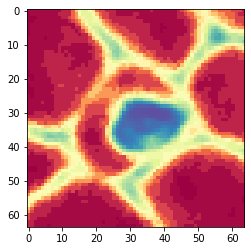

Epoch 42/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.4474 - acc: 0.0229 - val_loss: 2.5484 - val_acc: 0.0000e+00

Epoch 00042: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


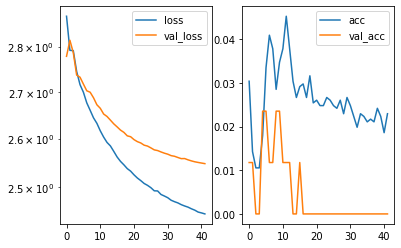

XYHWC: [[[0.6781248  0.54062515 0.5411976  0.43849027 0.9333686 ]]]
Top predictions :  Normal Probability : [[0.28841698]]
Top predictions :  MacroCheate Probability : [[0.29280287]]
Top predictions :  NonMatureP1 Probability : [[0.46272412]]
Top predictions :  MatureP1 Probability : [[0.3445961]]
True Label :  [0.         0.         1.         0.         0.50879372 0.51085552
 0.484375   0.4375     1.        ]


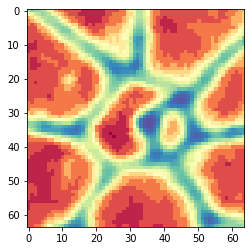

Epoch 43/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.4436 - acc: 0.0198 - val_loss: 2.5452 - val_acc: 0.0000e+00

Epoch 00043: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


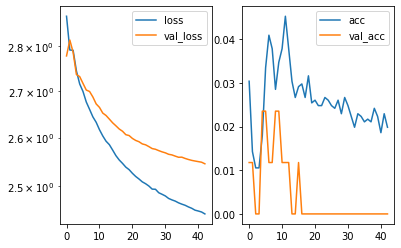

XYHWC: [[[0.6746698  0.55421865 0.5420778  0.44232333 0.9341475 ]]]
Top predictions :  Normal Probability : [[0.28411826]]
Top predictions :  MacroCheate Probability : [[0.2904101]]
Top predictions :  NonMatureP1 Probability : [[0.45964617]]
Top predictions :  MatureP1 Probability : [[0.34544134]]
True Label :  [0.         1.         0.         0.         0.51099537 0.38744213
 0.359375   0.34375    1.        ]


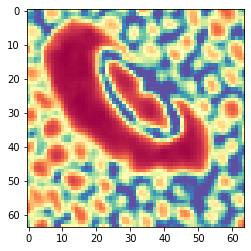

Epoch 44/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.4434 - acc: 0.0192 - val_loss: 2.5454 - val_acc: 0.0000e+00

Epoch 00044: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


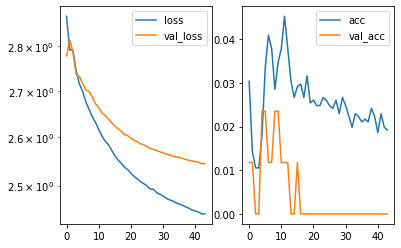

XYHWC: [[[0.67239803 0.5377876  0.54778504 0.4381608  0.9361123 ]]]
Top predictions :  Normal Probability : [[0.28107518]]
Top predictions :  MacroCheate Probability : [[0.2874319]]
Top predictions :  NonMatureP1 Probability : [[0.45786655]]
Top predictions :  MatureP1 Probability : [[0.34935907]]
True Label :  [0.         0.         1.         0.         0.50166784 0.48340941
 0.234375   0.296875   1.        ]


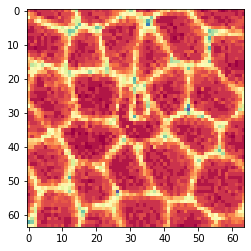

Epoch 45/150
1613/1613 [==============================] - 5s 3ms/step - loss: 2.4419 - acc: 0.0229 - val_loss: 2.5435 - val_acc: 0.0000e+00

Epoch 00045: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


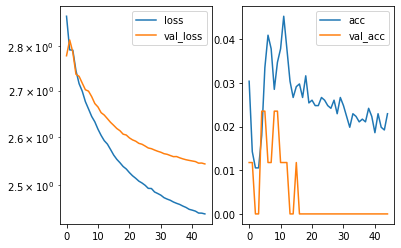

XYHWC: [[[0.67933077 0.54932815 0.5516318  0.4234032  0.93723583]]]
Top predictions :  Normal Probability : [[0.27717954]]
Top predictions :  MacroCheate Probability : [[0.28507757]]
Top predictions :  NonMatureP1 Probability : [[0.45561585]]
Top predictions :  MatureP1 Probability : [[0.35155967]]
True Label :  [0.         0.         0.         1.         0.5720306  0.48567168
 0.453125   0.390625   1.        ]


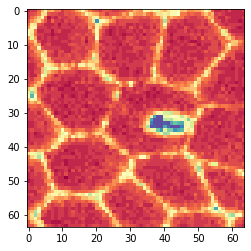

Epoch 46/150
 750/1613 [============>.................] - ETA: 2s - loss: 2.4372 - acc: 0.0227

KeyboardInterrupt: 

In [5]:
Train = NEATStaticDetection(config, TrainDataDir, KeyCategories, KeyCord, ModelDir, Model_Name, show = show)

Train.loadData()

Train.TrainModel()
